#**Install Requirement Library**

In [4]:
!pip install anytree
!pip install basemap
!pip install mycolorpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


  Preparing metadata (setup.py) ... done
  Created wheel for mycolorpy: filename=mycolorpy-1.5.1-py3-none-any.whl size=3851 sha256=31394c529827c8af9bbb8d37cbe573725d59c03a0b554bdfa503324bf5d6cebb
  Stored in directory: /root/.cache/pip/wheels/d6/1d/04/f8bfb8b04e3daba330b3f377c041b89304271ff98fb6704946
Successfully built mycolorpy


#**Import Library**

In [5]:
import pandas as pd
import numpy as np
import graphviz
import math
import seaborn as sns

from datetime import datetime
from matplotlib import pyplot as plt
from IPython.display import Image
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
from datetime import timedelta
from scipy import optimize
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import timedelta, datetime
from mycolorpy import colorlist as mcp

%matplotlib inline

#**Read Dataset**

In [6]:
# Memuat dataset
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
data_gempa = pd.read_csv(dataset)

# Mengubah kolom "time" menjadi tipe data datetime
data_gempa['time'] = pd.to_datetime(data_gempa['time'])

# Memisahkan kolom "time" menjadi dua kolom terpisah: "date" dan "time"
data_gempa['date'] = data_gempa['time'].dt.date
data_gempa['time'] = data_gempa['time'].dt.time

# Mengonversi kolom "time" menjadi string dengan format HH:MM:SS
data_gempa['time'] = data_gempa['time'].apply(lambda x: x.strftime('%H:%M:%S'))

selected_columns = ['time','date', 'latitude', 'longitude', 'place' ,'depth', 'mag', 'magType', 'type']
data_gempa = data_gempa.loc[:, selected_columns]

# Menampilkan lima baris pertama setelah pemisahan
data_gempa.head(5)

,time,date,latitude,longitude,place,depth,mag,magType,type
0,07:50:51,1968-01-01,32.958667,-115.863333,"24km WSW of Westmorland, CA",6.0,3.08,ml,earthquake
1,11:34:43,1968-01-01,33.468333,-120.179500,"53km S of Santa Rosa Is., CA",6.0,2.59,mh,earthquake
2,09:50:46,1968-01-02,35.705167,-118.039000,"22km WNW of Inyokern, CA",6.0,3.09,ml,earthquake
3,11:01:19,1968-01-02,35.740667,-118.060833,"25km WNW of Inyokern, CA",6.0,2.88,ml,earthquake
4,06:12:39,1968-01-04,35.111000,-119.085833,"23km SW of Lamont, CA",6.0,2.59,ml,earthquake


In [7]:
df = data_gempa

#**Feature Description**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247808 entries, 0 to 247807
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       247808 non-null  object 
 1   date       247808 non-null  object 
 2   latitude   247808 non-null  float64
 3   longitude  247808 non-null  float64
 4   place      247808 non-null  object 
 5   depth      247808 non-null  float64
 6   mag        247808 non-null  float64
 7   magType    247807 non-null  object 
 8   type       247808 non-null  object 
dtypes: float64(4), object(5)
memory usage: 17.0+ MB


In [9]:
data = df[['depth','mag']]
data.describe()

,depth,mag
count,247808.000000,247808.000000
mean,6.047375,2.016265
std,4.693010,0.645582
min,-2.288000,0.000000
25%,2.718000,1.600000
50%,5.560000,2.060000
75%,8.952000,2.390000
max,89.625000,7.300000


# **Univariate analysis**

<ipython-input-21-54f5f43b1518>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mycol, kde=False, ax=ax_hist, color='blue')


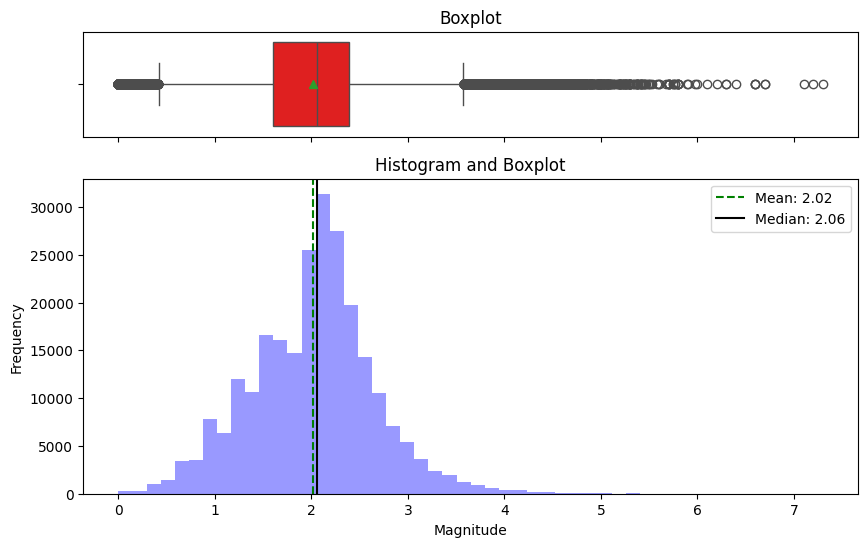

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def hist_box(mycol):
    f, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)}, figsize=(10, 6))

    sns.boxplot(mycol, ax=ax_box, showmeans=True, color='red', orient='h')
    sns.distplot(mycol, kde=False, ax=ax_hist, color='blue')

    mean_val = np.mean(mycol)
    median_val = np.median(mycol)

    ax_hist.axvline(mean_val, color='g', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax_hist.axvline(median_val, color='black', linestyle='-', label=f'Median: {median_val:.2f}')

    ax_hist.legend()

    ax_box.set(ylabel='')
    ax_hist.set(title='Histogram and Boxplot', xlabel='Magnitude', ylabel='Frequency')
    ax_box.set_title('Boxplot', fontsize=12)

    plt.show()

# Apply the function to the earthquake magnitude data
hist_box(data_gempa.mag)

<ipython-input-21-54f5f43b1518>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mycol, kde=False, ax=ax_hist, color='blue')


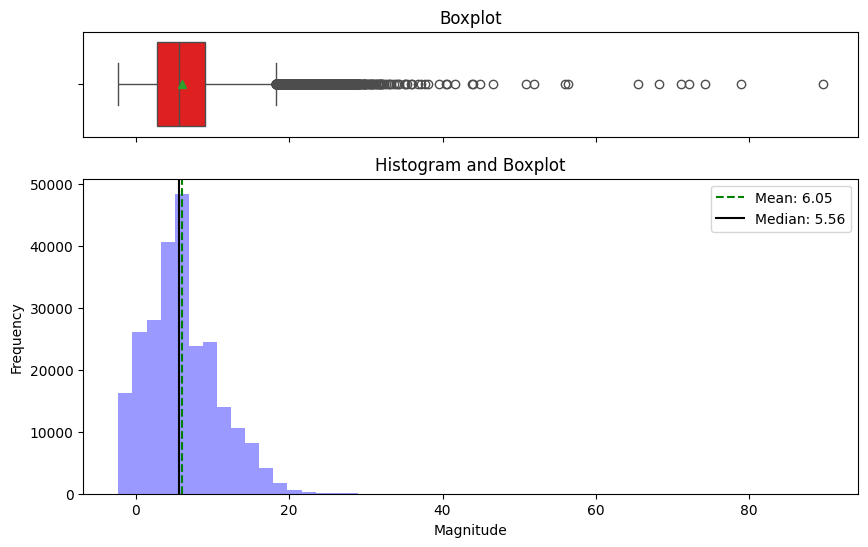

In [22]:
hist_box(data_gempa.depth)

# **Categorical variables**

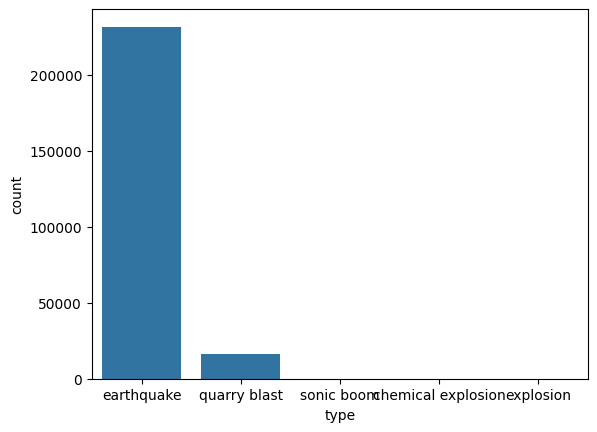

In [23]:
# use countplot to plot number of units sold by model of treadmill
sns.countplot(x='type', data=data_gempa)
plt.show()

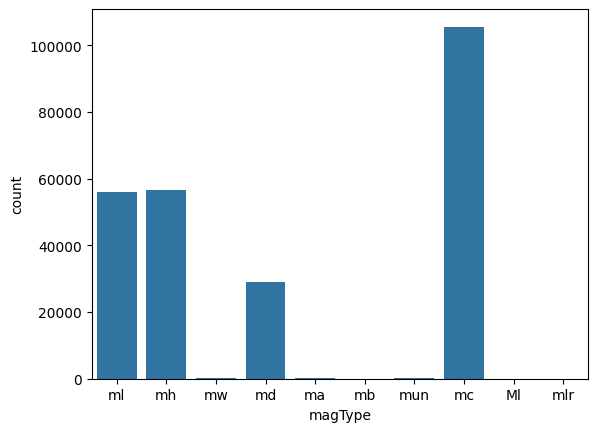

In [26]:
# use countplot to plot number of units sold by model of treadmill
sns.countplot(x='magType', data=data_gempa)
plt.show()

# **Multi-variate Analysis**

In [28]:
# slice out the numerical variabales from dataset to check the correlation between the numericals.
fit_num = data_gempa.select_dtypes(include='float64')
fit_num.head()

,latitude,longitude,depth,mag
0,32.958667,-115.863333,6.0,3.08
1,33.468333,-120.179500,6.0,2.59
2,35.705167,-118.039000,6.0,3.09
3,35.740667,-118.060833,6.0,2.88
4,35.111000,-119.085833,6.0,2.59


In [31]:
corr = fit_num.corr()
corr

,latitude,longitude,depth,mag
latitude,1.000000,-0.766399,-0.168191,-0.206105
longitude,-0.766399,1.000000,-0.037858,0.145173
depth,-0.168191,-0.037858,1.000000,-0.050624
mag,-0.206105,0.145173,-0.050624,1.000000


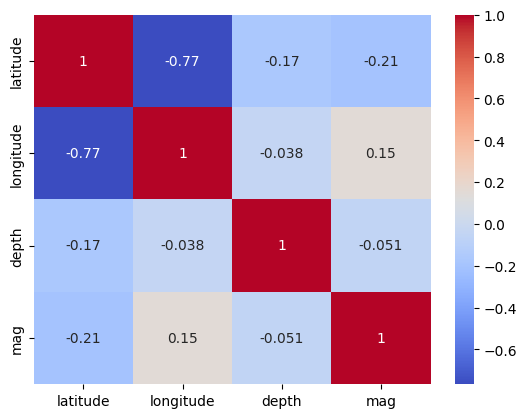

In [32]:
# plot the heatmap to analyse the correlation between all the numerical variables
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

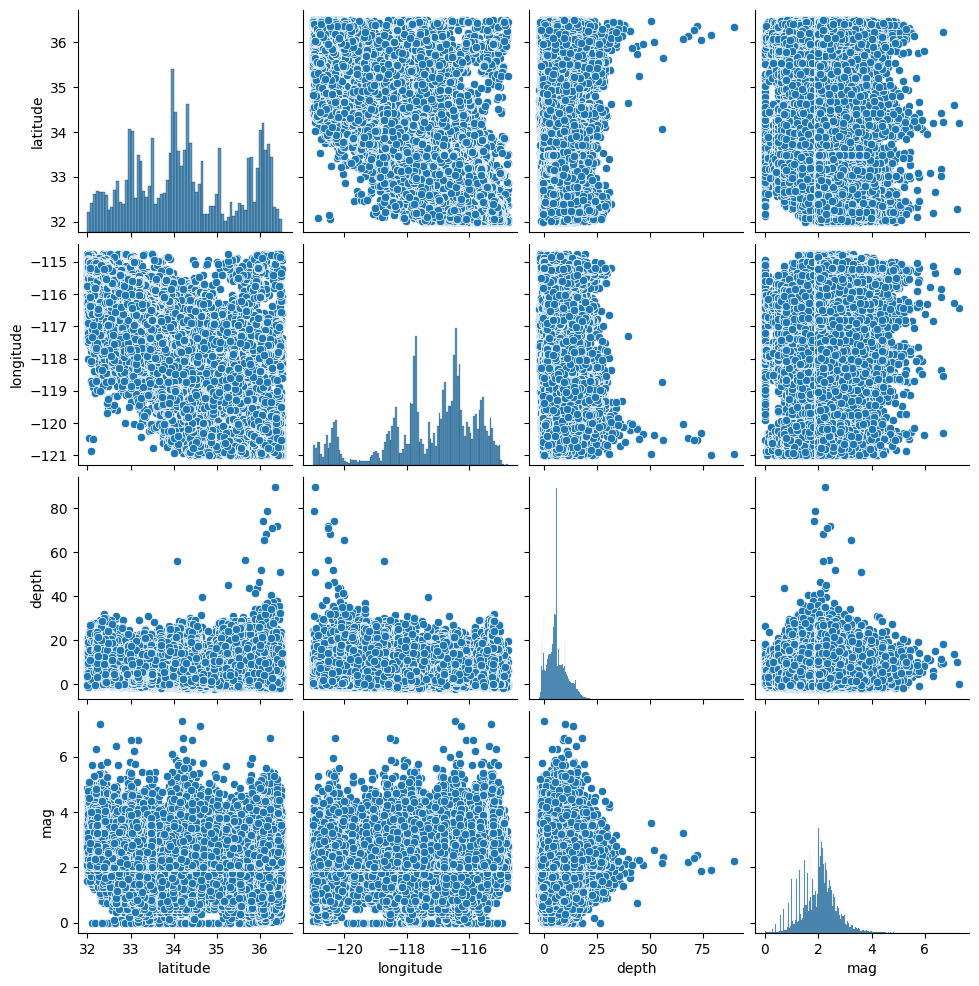

In [34]:
# Looking at relations between the numerical variables
sns.pairplot(data_gempa)

# **Statistical Description**

In [ ]:
# Total earthquake events
N_tot = df['latitude'].count()
print('Total earthquake events **1968 until 2018**', N_tot)
print('Average number of events per week:', round(N_tot/(52*(2018-1968+1)),2) )
print('Average number of events per year:', round(N_tot/((2018-1968+1)),2) )

# List of largest earthquake events
print('The magnitude of the largest earthquake:')
df[['mag','time']].sort_values('mag',ascending=False).head(5)

Total earthquake events **1968 until 2018** 247808
Average number of events per week: 93.44
Average number of events per year: 4858.98
The magnitude of the largest earthquake:


,mag,time
168133,7.3,1992-06-28 11:57:34.130000+00:00
227923,7.2,2010-04-04 22:40:42.360000+00:00
201925,7.1,1999-10-16 09:46:44.460000+00:00
186128,6.7,1994-01-17 12:30:55.390000+00:00
64973,6.7,1983-05-02 23:42:38.060000+00:00


In [ ]:
print('Magnitude Maximum:', df['mag'].max())
print('Magnitude Minium:', df['mag'].min())
print('Magnitude Rata-Rata:', df['mag'].mean())

Magnitude Maximum: 7.3
Magnitude Minium: 0.0
Magnitude Rata-Rata: 2.016265294098657


In [ ]:
from datetime import datetime

#Object Date Time
df['dt_time'] = pd.to_datetime(df['time'])

# Column year, month, and day
df['dofy'] = df['dt_time'].dt.strftime("%j").astype(int)
df['year'] = df['dt_time'].dt.year
df['month'] = df['dt_time'].dt.month
df['day'] = df['dt_time'].dt.day

# Calculate the number of earthquake events per time (DMY)
dofy_tot = df['dofy'].value_counts(sort=True)
dofy_tot.sort_index(axis=0, inplace=True)

year_tot = df['year'].value_counts(sort=True)
month_tot = df['month'].value_counts(sort=True)
day_tot = df['day'].value_counts(sort=True)

# Calculate the number of earthquake events per time (DMY)
year_ave = year_tot.mean()
dofy_ave = dofy_tot.mean()
month_ave = month_tot.mean()


<ipython-input-22-c4b92113b026>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dt_time'] = pd.to_datetime(df['time'])
<ipython-input-22-c4b92113b026>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dofy'] = df['dt_time'].dt.strftime("%j").astype(int)
<ipython-input-22-c4b92113b026>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

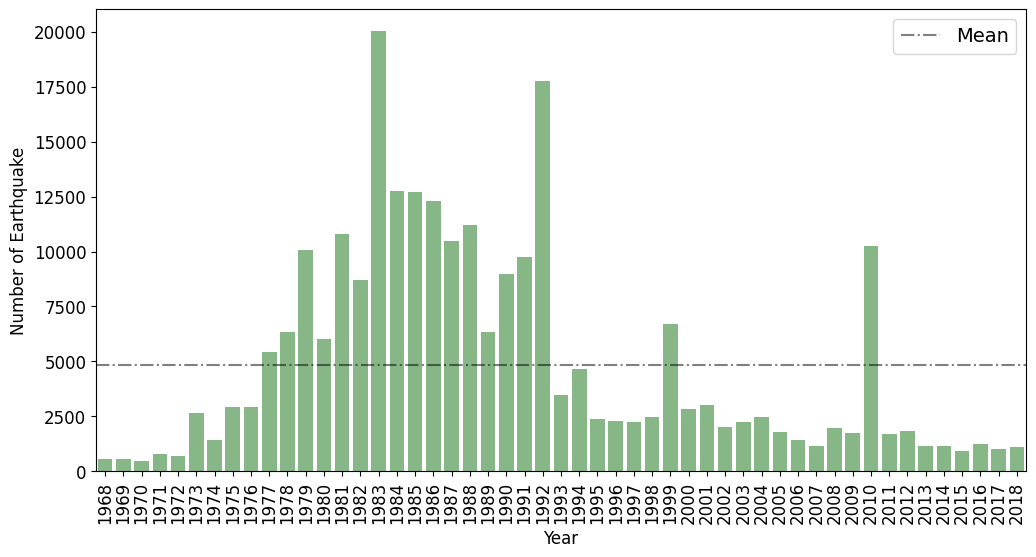

In [ ]:
# Plot Bar Chart
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 14

plt.figure(figsize=(12,6))

sns.barplot(x=year_tot.index, y=year_tot.values, alpha=0.5, color='green')
plt.axhline(y=year_ave, color='k', linestyle='-.',
            alpha=0.5, label='Mean')
plt.xlabel('Year'), plt.ylabel('Number of Earthquake')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


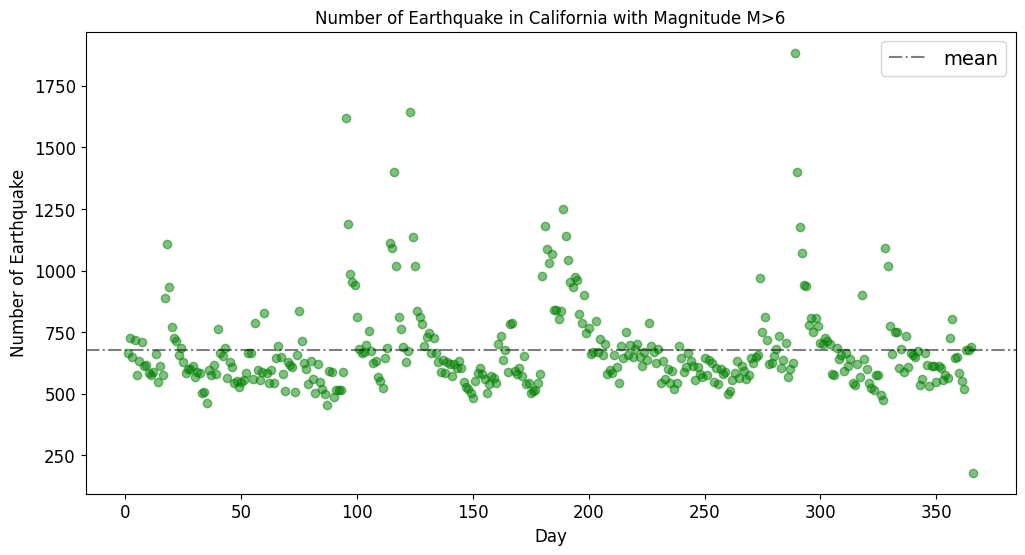

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(dofy_tot.index, dofy_tot.values ,'go', alpha=0.5)
plt.axhline(y=dofy_ave, color='k',linestyle='-.',alpha=0.5,label='mean')
plt.ylabel('Number of Earthquake'), plt.xlabel('Day')
plt.title('Number of Earthquake in California with Magnitude M>6')
plt.legend()
plt.show()

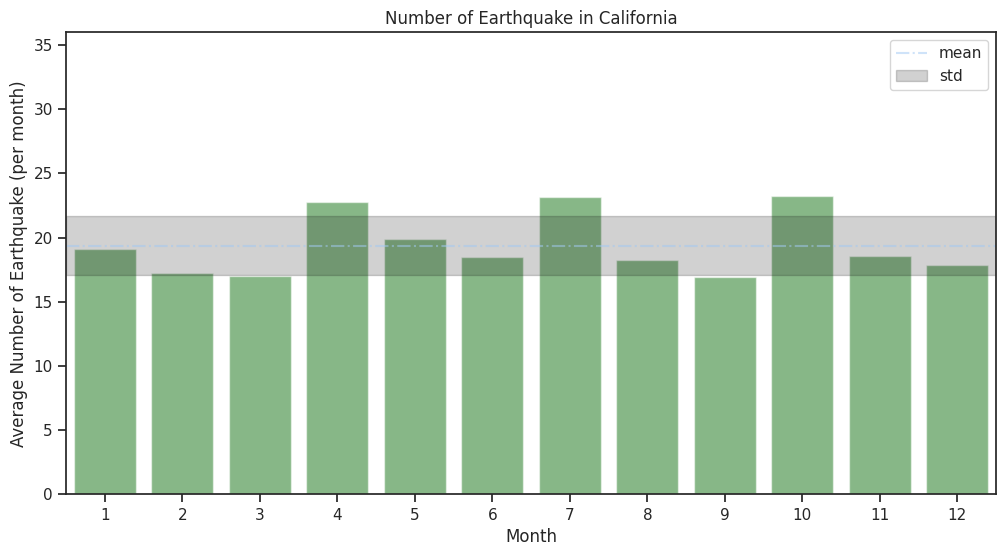

In [ ]:
# Array of month lengths
month_length = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
# Sort by month index
month_sort = month_tot.sort_index()
# Normalize by the length of the month
month_norm = month_sort.values / (month_length*(2017-1983+1))

# Plot (including daily average and the deviation)
plt.figure(figsize=(12,6))

ax = sns.barplot(x=month_sort.index, y=month_norm, alpha=0.5, color='green')
ax.set_ylim([0, 36])
plt.axhline(y=np.mean(month_norm), color='b', linestyle='-.',
            alpha=0.5, label='mean')
plt.axhspan(np.mean(month_norm)-np.std(month_norm),
            np.mean(month_norm)+np.std(month_norm),
            color='k', alpha=0.2, label='std')
plt.ylabel('Average Number of Earthquake (per month)'), plt.xlabel('Month')
plt.title('Number of Earthquake in California')
plt.legend()
plt.show()

#**Earthquake Location Visualization**

In [ ]:
import folium
import pandas as pd

# GitHub
github_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"

# Read dataset
df = pd.read_csv(github_url, sep=',')

# Determining geographic boundaries based on earthquake data
max_lat = df['latitude'].max()
min_lat = df['latitude'].min()
max_lon = df['longitude'].max()
min_lon = df['longitude'].min()

# Calculate the center of the earthquake data region
center_lat = (max_lat + min_lat) / 2
center_lon = (max_lon + min_lon) / 2

# Calculate the appropriate zoom level to focus on the region with earthquake data
zoom_level = 8

# Create a map with the center location of the earthquake data area
m = folium.Map(location=[center_lat, center_lon], zoom_start=zoom_level)

# Determine the appropriate magnitude and color ranges
magnitude_ranges = [(4, 5, 'blue', 'Magnitude 4-5'),
                   (5.1, 6, 'green', 'Magnitude 5.1-6'),
                   (6.1, 7, 'orange', 'Magnitude 6.1-7'),
                   (7.1, 9, 'red', 'Magnitude 7.1-9')]

# Add a marker for each earthquake on the map
for min_mag, max_mag, color, label in magnitude_ranges:
    mag_data = df[(df['mag'] >= min_mag) & (df['mag'] <= max_mag)]
    for index, row in mag_data.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=3,  # Ukuran marker
            color=color,  # Warna marker
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            popup=f"Mag: {row['mag']}, Depth: {row['depth']} km"  # Informasi dalam popup
        ).add_to(m)

# Added a legend to the map with a vertical bar in the bottom left corner
legend_html = """
     <div style="position: fixed;
                 bottom: 100px; left: 10px; width: 200px; height: 160px;
                 background-color: white; opacity: 0.7; z-index:9999; font-size:12px; text-align:center; padding: 5px;">
     <p><b>Legend</b></p>
     <div style="background-color: blue; width: 20px; height: 20px; display: inline-block;"></div>Magnitudo: 4-5<br>
     <div style="background-color: green; width: 20px; height: 20px; display: inline-block;"></div>Magnitudo: 5.1-6<br>
     <div style="background-color: orange; width: 20px; height: 20px; display: inline-block;"></div>Magnitudo: 6.1-7<br>
     <div style="background-color: red; width: 20px; height: 20px; display: inline-block;"></div>Magnitudo: 7.1-9<br>
      </div>
     """

m.get_root().html.add_child(folium.Element(legend_html))

# save to HTML file
m.save("california_earthquake_map.html")

# display in notebook
m


<ipython-input-27-f292d0bdfdab>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(magnitude_ranges))
<ipython-input-27-f292d0bdfdab>:44: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


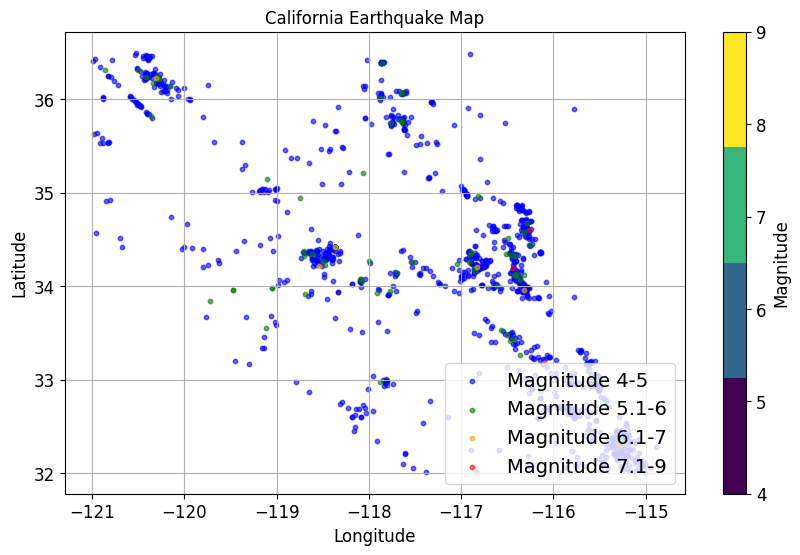

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# GitHub URL dataset gempa bumi di California
github_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"

# Membaca dataset
df = pd.read_csv(github_url, sep=',')

# Determining geographic boundaries based on earthquake data
max_lat = df['latitude'].max()
min_lat = df['latitude'].min()
max_lon = df['longitude'].max()
min_lon = df['longitude'].min()

# Calculate the center of the earthquake data region
center_lat = (max_lat + min_lat) / 2
center_lon = (max_lon + min_lon) / 2

# Calculate the appropriate zoom level to focus on the region with earthquake data
zoom_level = 8

# Determine the appropriate magnitude and color ranges
magnitude_ranges = [(4, 5, 'blue', 'Magnitude 4-5'),
                   (5.1, 6, 'green', 'Magnitude 5.1-6'),
                   (6.1, 7, 'orange', 'Magnitude 6.1-7'),
                   (7.1, 9, 'red', 'Magnitude 7.1-9')]

# Create Map
plt.figure(figsize=(10, 6))
for min_mag, max_mag, color, label in magnitude_ranges:
    mag_data = df[(df['mag'] >= min_mag) & (df['mag'] <= max_mag)]
    plt.scatter(mag_data['longitude'], mag_data['latitude'], s=10, alpha=0.6, c=color, label=label)

# Add Legend
plt.legend(loc='lower right')

# Added vertical colorbar for magnitude description
cmap = plt.cm.get_cmap('viridis', len(magnitude_ranges))
norm = plt.Normalize(vmin=4, vmax=9)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Magnitude')

# Add Lable and Title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Earthquake Map')

# Display Map
plt.grid(True)
plt.show()


#**Frequency**

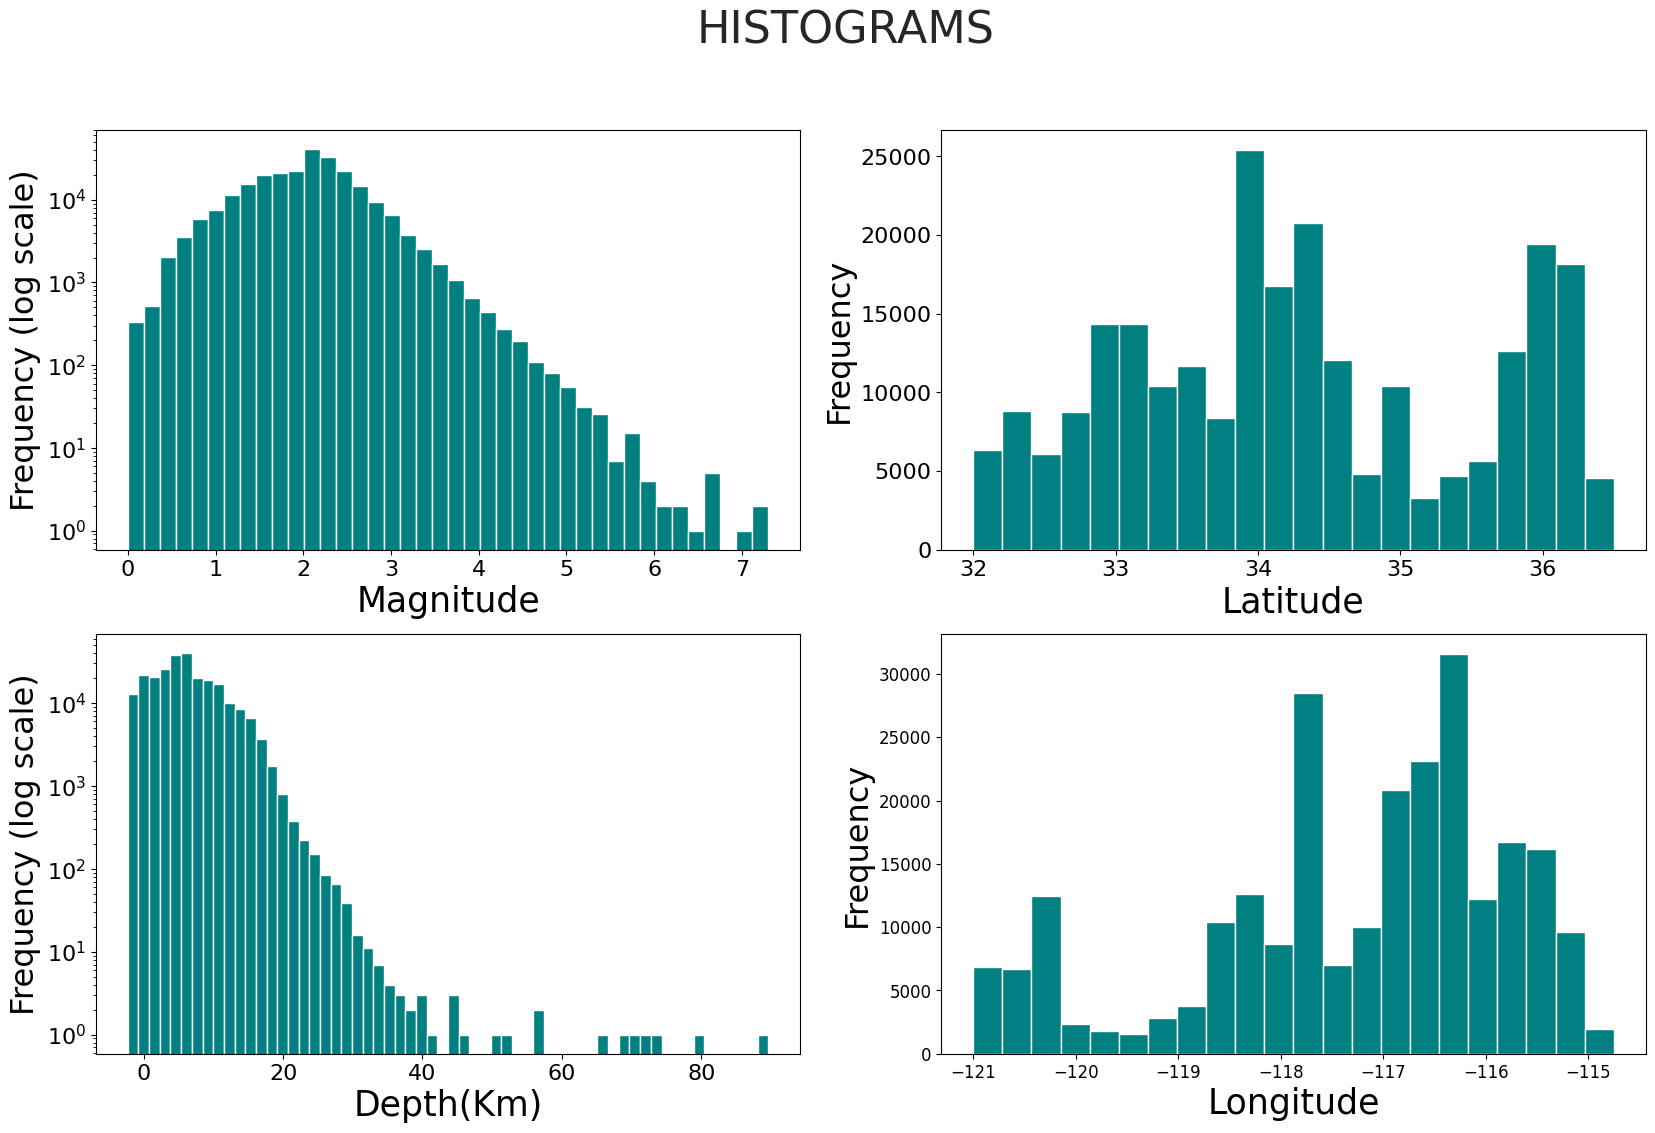

In [ ]:
#fig=plt.figure()
fig,axes=plt.subplots(2,2,figsize=(20,12))
sns.set(style="ticks", palette="pastel")
fig.suptitle('HISTOGRAMS',fontsize=32)
# Draw a nested boxplot
axes[0][0].hist(df['mag'],bins=40,color='teal')
axes[1][0].hist(df['depth'],bins=60,color='teal')
axes[0][1].hist(df['latitude'],bins=22,color='teal')
axes[1][1].hist(df['longitude'],bins=22,color='teal')
#plt.hist(DATA['Time'],ax=axes[0][])
for i in range(2):
    for j in range(2):
        ax = axes[i,j]
        if i == 0 and j==0:
            title = ax.set_xlabel("Magnitude",fontsize=25) #set font and title of x label
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23) #set font and title of y label
            ax.set_yscale('log') #set log scale
            ax.tick_params(labelsize=16) #change labelsize
        elif i == 1 and j==0:
            title = ax.set_xlabel("Depth(Km)",fontsize=25)
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23)
            ax.set_yscale('log')
            ax.tick_params(labelsize=16)
        elif i == 0 and j==1:
            title = ax.set_xlabel("Latitude",fontsize=25  )
            title2 = ax.set_ylabel("Frequency",fontsize=23)
            ax.tick_params(labelsize=16)
        elif i==1 and j == 1:
            title = ax.set_xlabel("Longitude", fontsize=25 )
            title2 = ax.set_ylabel("Frequency",fontsize=23)


## **Depth, Latitude**

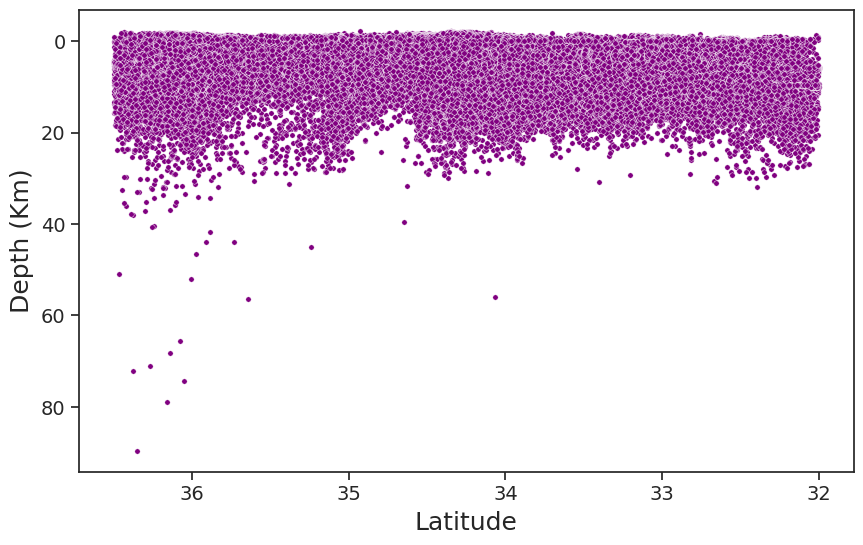

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(x=df['latitude'],y=df['depth'],s=15,color='purple')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Latitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth (Km)',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize

## **Depth, Longitude**

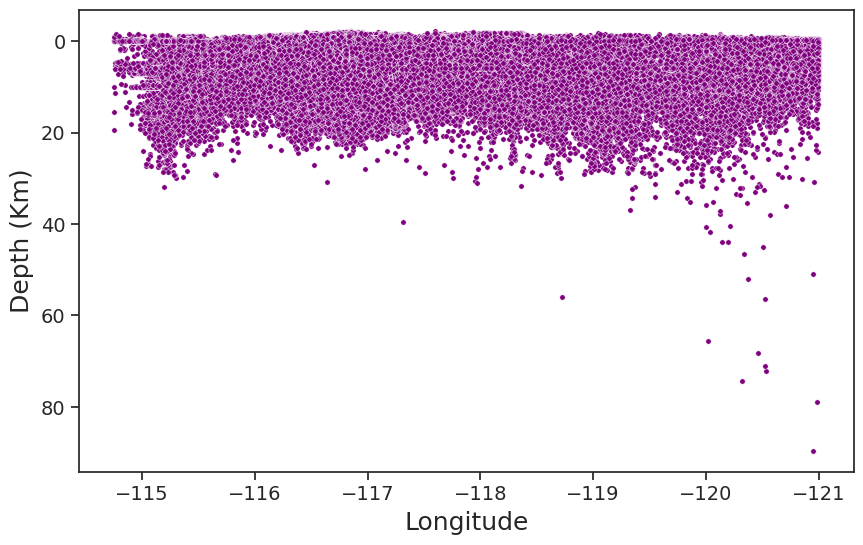

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(x=df['longitude'],y=df['depth'],s=15,color='purple')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Longitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth (Km)',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize

#**Break Location into Grid 1x1 (degree)**

<ipython-input-31-556ff83a6093>:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(magnitude_ranges))
<ipython-input-31-556ff83a6093>:43: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


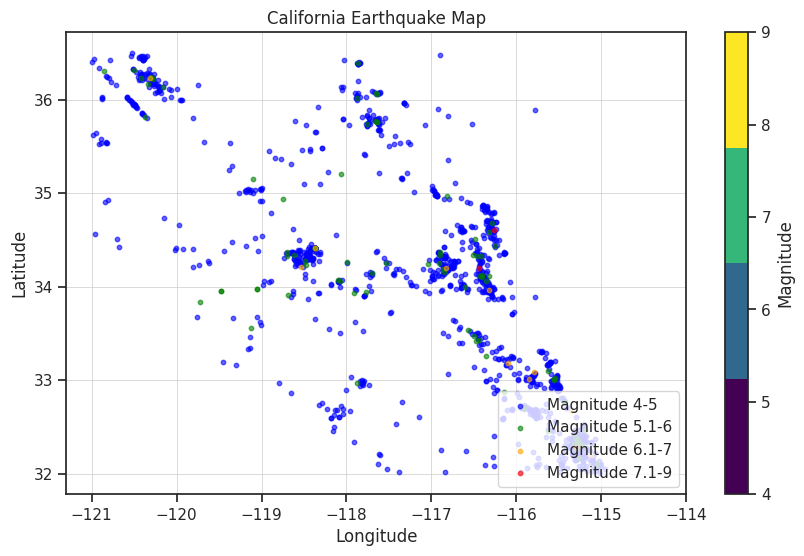

In [ ]:
# Membaca dataset
df = pd.read_csv(dataset, sep=',')

# Determining geographic boundaries based on earthquake data
max_lat = df['latitude'].max()
min_lat = df['latitude'].min()
max_lon = df['longitude'].max()
min_lon = df['longitude'].min()

# Calculate the center of the earthquake data region
center_lat = (max_lat + min_lat) / 2
center_lon = (max_lon + min_lon) / 2

# Calculate the appropriate zoom level to focus on the region with earthquake data
zoom_level = 8

# Determine the appropriate magnitude and color ranges
magnitude_ranges = [(4, 5, 'blue', 'Magnitude 4-5'),
                   (5.1, 6, 'green', 'Magnitude 5.1-6'),
                   (6.1, 7, 'orange', 'Magnitude 6.1-7'),
                   (7.1, 9, 'red', 'Magnitude 7.1-9')]

# Create Map
plt.figure(figsize=(10, 6))
for min_mag, max_mag, color, label in magnitude_ranges:
    mag_data = df[(df['mag'] >= min_mag) & (df['mag'] <= max_mag)]
    plt.scatter(mag_data['longitude'], mag_data['latitude'], s=10, alpha=0.6, c=color, label=label)

# Add Grid (1x1 degree interval)
plt.grid(linewidth=0.5)
plt.xticks(range(int(min_lon), int(max_lon) + 1, 1))  # Interval 1 derajat untuk longitude
plt.yticks(range(int(min_lat), int(max_lat) + 1, 1))  # Interval 1 derajat untuk latitude

# Add Legend
plt.legend(loc='lower right')

# Added vertical colorbar for magnitude description
cmap = plt.cm.get_cmap('viridis', len(magnitude_ranges))
norm = plt.Normalize(vmin=4, vmax=9)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Magnitude')

# Add Labels and Title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Earthquake Map')

# Display Map
plt.show()


In [ ]:
# Read dataset
df = pd.read_csv(dataset, sep=',')

# Determining geographic boundaries based on earthquake data
max_lat = df['latitude'].max()
min_lat = df['latitude'].min()
max_lon = df['longitude'].max()
min_lon = df['longitude'].min()

# Print the latitude and longitude range
print("Range Latitude:", min_lat, "until", max_lat)
print("Range Longitude:", min_lon, "until", max_lon)


Range Latitude: 32.0 until 36.5
Range Longitude: -121.0 until -114.75


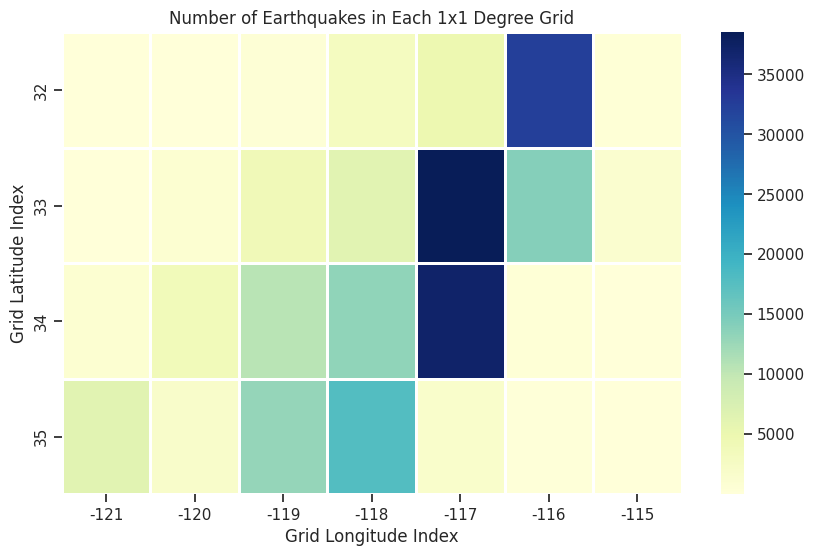

In [ ]:
# Calculate Sum of Earthquake in grid 1x1 degree
lat_bins = np.arange(int(min_lat), int(max_lat) + 1, 1)
lon_bins = np.arange(int(min_lon), int(max_lon) + 1, 1)

grid_counts = np.zeros((len(lat_bins) - 1, len(lon_bins) - 1), dtype=int)

for i in range(len(lat_bins) - 1):
    for j in range(len(lon_bins) - 1):
        # Filter data within the current grid
        grid_data = df[
            (df['latitude'] >= lat_bins[i]) & (df['latitude'] < lat_bins[i + 1]) &
            (df['longitude'] >= lon_bins[j]) & (df['longitude'] < lon_bins[j + 1])
        ]
        # Count earthquakes in the grid
        grid_counts[i][j] = len(grid_data)

# save a result in DataFrame
grid_df = pd.DataFrame(grid_counts, index=range(int(min_lat), int(max_lat)), columns=range(int(min_lon), int(max_lon)))

# Display result
plt.figure(figsize=(10, 6))
sns.heatmap(grid_df, cmap='YlGnBu', linecolor='white', linewidth=1)
plt.xlabel('Grid Longitude Index')
plt.ylabel('Grid Latitude Index')
plt.title('Number of Earthquakes in Each 1x1 Degree Grid')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Calculate Sum of Earthquake in grid 1x1 degree
lat_bins = np.arange(int(min_lat), int(max_lat) + 1, 1)
lon_bins = np.arange(int(min_lon), int(max_lon) + 1, 1)

grid_counts = np.zeros((len(lat_bins) - 1, len(lon_bins) - 1), dtype=int)

for i in range(len(lat_bins) - 1):
    for j in range(len(lon_bins) - 1):
        # Filter data within the current grid
        grid_data = df[
            (df['latitude'] >= lat_bins[i]) & (df['latitude'] < lat_bins[i + 1]) &
            (df['longitude'] >= lon_bins[j]) & (df['longitude'] < lon_bins[j + 1])
        ]
        # Count earthquakes in the grid
        grid_counts[i][j] = len(grid_data)

# Save in DataFrame
grid_df = pd.DataFrame(grid_counts, index=range(int(min_lat), int(max_lat)), columns=range(int(min_lon), int(max_lon)))

# Display Result
print("Table of Number of Earthquakes in Each 1x1 Degree Grid:")
print(grid_df)

Table of Number of Earthquakes in Each 1x1 Degree Grid:
    -121  -120   -119   -118   -117   -116  -115
32     3    22    583   3140   4911  32418   436
33   148   906   4020   6411  38522  14091  1234
34   951  3851  10634  13308  37093    436     3
35  6439  1872  12997  17878   1756    204    29
